In [1]:
!pip install opencv-python matplotlib numpy


Mount Google colab to be able access files and directory

In [2]:
#This is what importing libraries looks like in Python!
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Navigate to a folder in your Drive (adjust the path as needed)
!ls /content/drive/My\ Drive/


Mounted at /content/drive
'Advances chapter'					    ollie.gdoc
 ANBEH-D-23-00602_reviewer.pdf				    poseEstimation
 bombus1_backup						    Presentations
 bombus2_backup						    temp
'Colab Notebooks'					    unit_1_1_3_1_4_230715_bees.gsheet
'Committees and Service'				   'Untitled document (1).gdoc'
 convertedModel						   'Untitled document (2).gdoc'
'Copy of ele.13583.pdf'					   'Untitled document.gdoc'
'Copy of Rubric for Precision Pest Ecologist 211021.xlsx'  'Untitled form.gform'
'Crall Lab Data'					   'Untitled presentation (1).gslides'
'Grants and funding'					   'Untitled presentation.gslides'
 HumbleBeeBackup					   'UW-Madison pollinator monitoring.gdoc'
 modelZooiNat


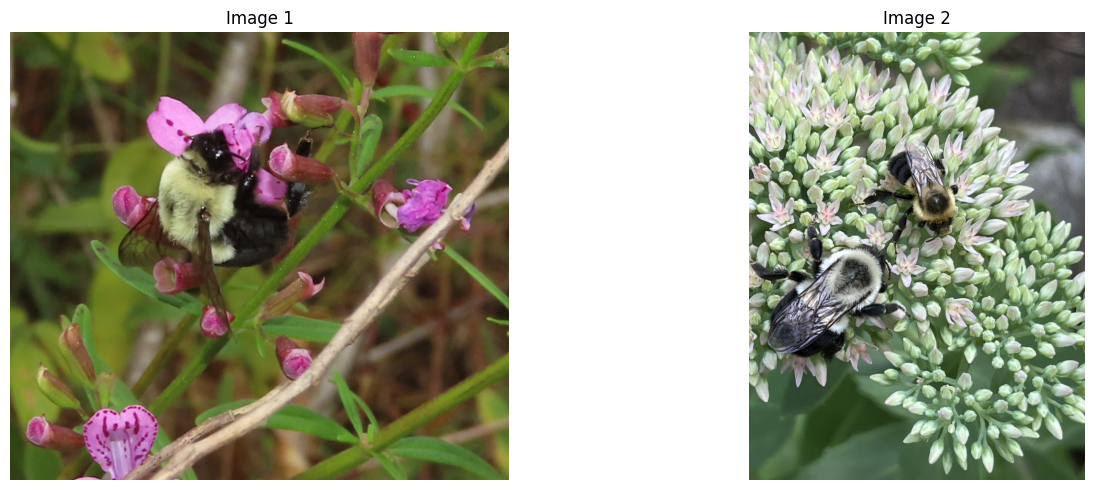

In [3]:
import cv2 #Open CV - very widely used package!
import matplotlib.pyplot as plt
import os
import requests

# List of *Bombus impatiens* image URLs (use real URLs here)
image_urls = [
    "https://static.inaturalist.org/photos/455615722/original.jpeg",  # Replace with real URLs
    "https://inaturalist-open-data.s3.amazonaws.com/photos/455658371/original.jpg",
]

# Create a directory to store images
os.makedirs("bombus_images", exist_ok=True)

# Download and display each image
fig, axes = plt.subplots(1, len(image_urls), figsize=(15, 5))
for idx, url in enumerate(image_urls):
    # Download the image
    response = requests.get(url, stream=True)
    file_path = f"bombus_images/bombus_{idx}.jpg"
    with open(file_path, "wb") as file:
        file.write(response.content)

    # Load the image
    image = cv2.imread(file_path)
    if image is None:
        axes[idx].axis("off")
        axes[idx].set_title("Failed to Load")
        continue

    # Convert BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image
    axes[idx].imshow(image_rgb)
    axes[idx].axis("off")
    axes[idx].set_title(f"Image {idx+1}")

plt.tight_layout()
plt.show()


Great! Now use the blank 'code' cell below to make a version of the code above that plots two images of your choosing from inaturalist

In [ ]:
#Blank code block...

In [4]:
import numpy as np
from PIL import Image #PIL = Python Image Library
from io import BytesIO

# URL of the image
image_url = "https://static.inaturalist.org/photos/455615722/original.jpeg"

# Download the image
response = requests.get(image_url)
image_pil = Image.open(BytesIO(response.content))

# Convert the image to OpenCV format (NumPy array)
image = np.array(image_pil)
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # Ensure OpenCV format

# Crop the upper-left 100x100 pixels
cropped_image = image[300:700, 300:700,]

#What are the dimenbsions of this image matrix?
cropped_image.shape
print(cropped_image[:,:,1])

[[104  99  98 ...  38  32  27]
 [103 102 102 ...  23  17  21]
 [102 104 105 ...  20  30  46]
 ...
 [122 123 122 ... 102 103 104]
 [118 119 119 ... 102 102 102]
 [117 118 119 ... 102 101 101]]


In [5]:

# Separate the color channels of the cropped image
cropped_blue_channel = cropped_image[:, :, 0]  # Blue
cropped_green_channel = cropped_image[:, :, 1]  # Green
cropped_red_channel = cropped_image[:, :, 2]  # Red

# Separate the color channels of the full image
blue_channel = image[:, :, 0]
green_channel = image[:, :, 1]
red_channel = image[:, :, 2]

# Function to add a color bar
def plot_with_colorbar(ax, data, cmap, title):
    img = ax.imshow(data, cmap=cmap, vmin=0, vmax=255)
    ax.set_title(title)
    ax.axis("off")
    cbar = plt.colorbar(img, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label("Intensity", rotation=270, labelpad=10)

# Plot the cropped image and its color channels
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# Cropped images
axs[0, 0].imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title("Cropped Image (Original)")
axs[0, 0].axis("off")

plot_with_colorbar(axs[0, 1], cropped_blue_channel, "Blues", "Cropped (Blue Channel)")
plot_with_colorbar(axs[0, 2], cropped_green_channel, "Greens", "Cropped (Green Channel)")
plot_with_colorbar(axs[0, 3], cropped_red_channel, "Reds", "Cropped (Red Channel)")

# Full images
axs[1, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[1, 0].set_title("Full Image (Original)")
axs[1, 0].axis("off")

plot_with_colorbar(axs[1, 1], blue_channel, "Blues", "Full Image (Blue Channel)")
plot_with_colorbar(axs[1, 2], green_channel, "Greens", "Full Image (Green Channel)")
plot_with_colorbar(axs[1, 3], red_channel, "Reds", "Full Image (Red Channel)")

plt.tight_layout()
plt.show()


Output hidden; open in https://colab.research.google.com to view.

Next, we are going to do some basic color operations by separately looking at the unique color channels

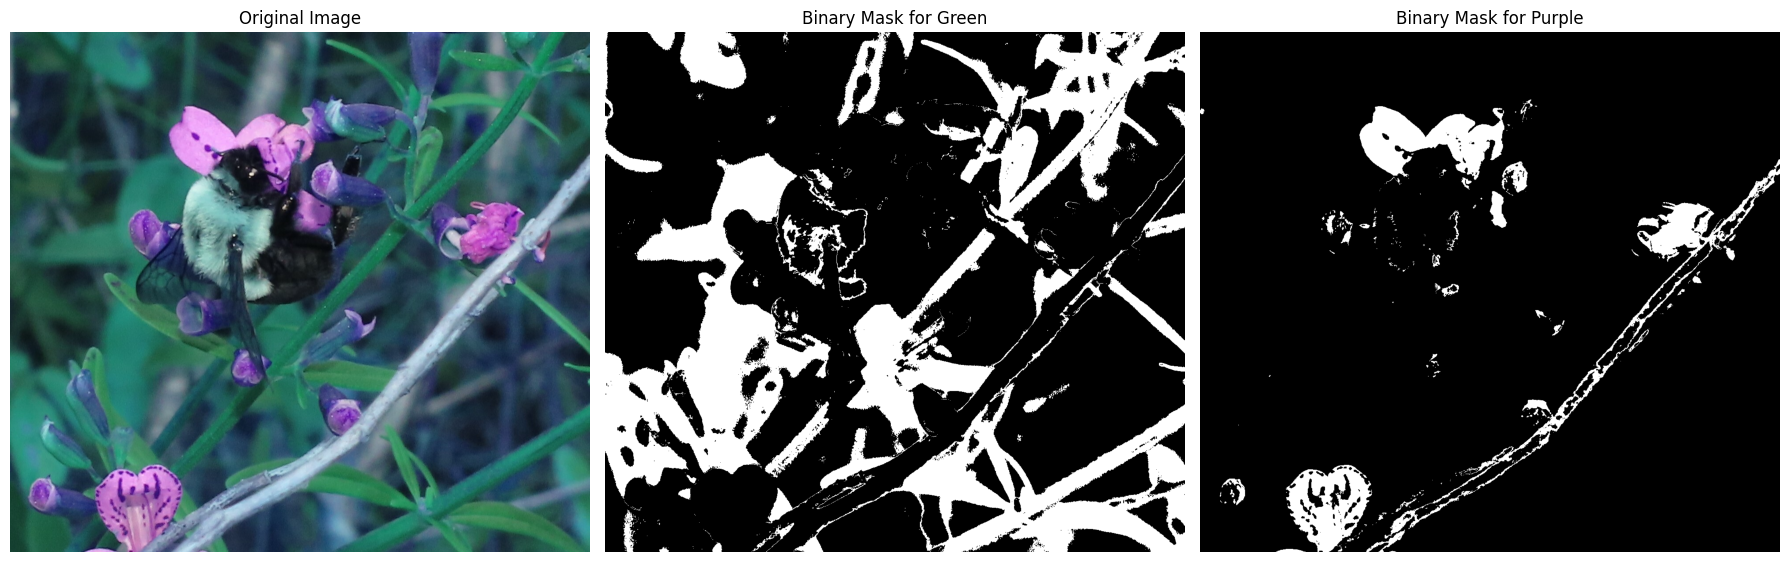

In [6]:
# Create binary mask for green
red_mask = (image[:, :, 0] < 150) & (image[:, :, 1] > 100) & (image[:, :, 2] < 150)
red_mask = red_mask.astype(np.uint8) * 255  # Convert to binary format (0 or 255)

# Create binary mask for purple (Looks for high values in both red AND blue channels)
purple_mask = (image[:, :, 0] > 150) & (image[:, :, 1] < 200) & (image[:, :, 2] > 150)
purple_mask = purple_mask.astype(np.uint8) * 255  # Convert to binary format (0 or 255)

# Display the original image and binary masks
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Original image
axs[0].imshow(image)
axs[0].set_title("Original Image")
axs[0].axis("off")

# Red mask
axs[1].imshow(red_mask, cmap="gray")
axs[1].set_title("Binary Mask for Green")
axs[1].axis("off")

# Purple mask
axs[2].imshow(purple_mask, cmap="gray")
axs[2].set_title("Binary Mask for Purple")
axs[2].axis("off")

plt.tight_layout()
plt.show()

This looks pretty good! But is also a bit messy. A couple approaches to cleaning this up:

First, you could tweak your parameters. For example: how would you edit the code above to focus on lighter purple?

Even without improving your 'pixel level' accuracy, you can also use 'morphological operations' to clean up especially small noise. Here, we'll demonstrate this with erosion and dilation:

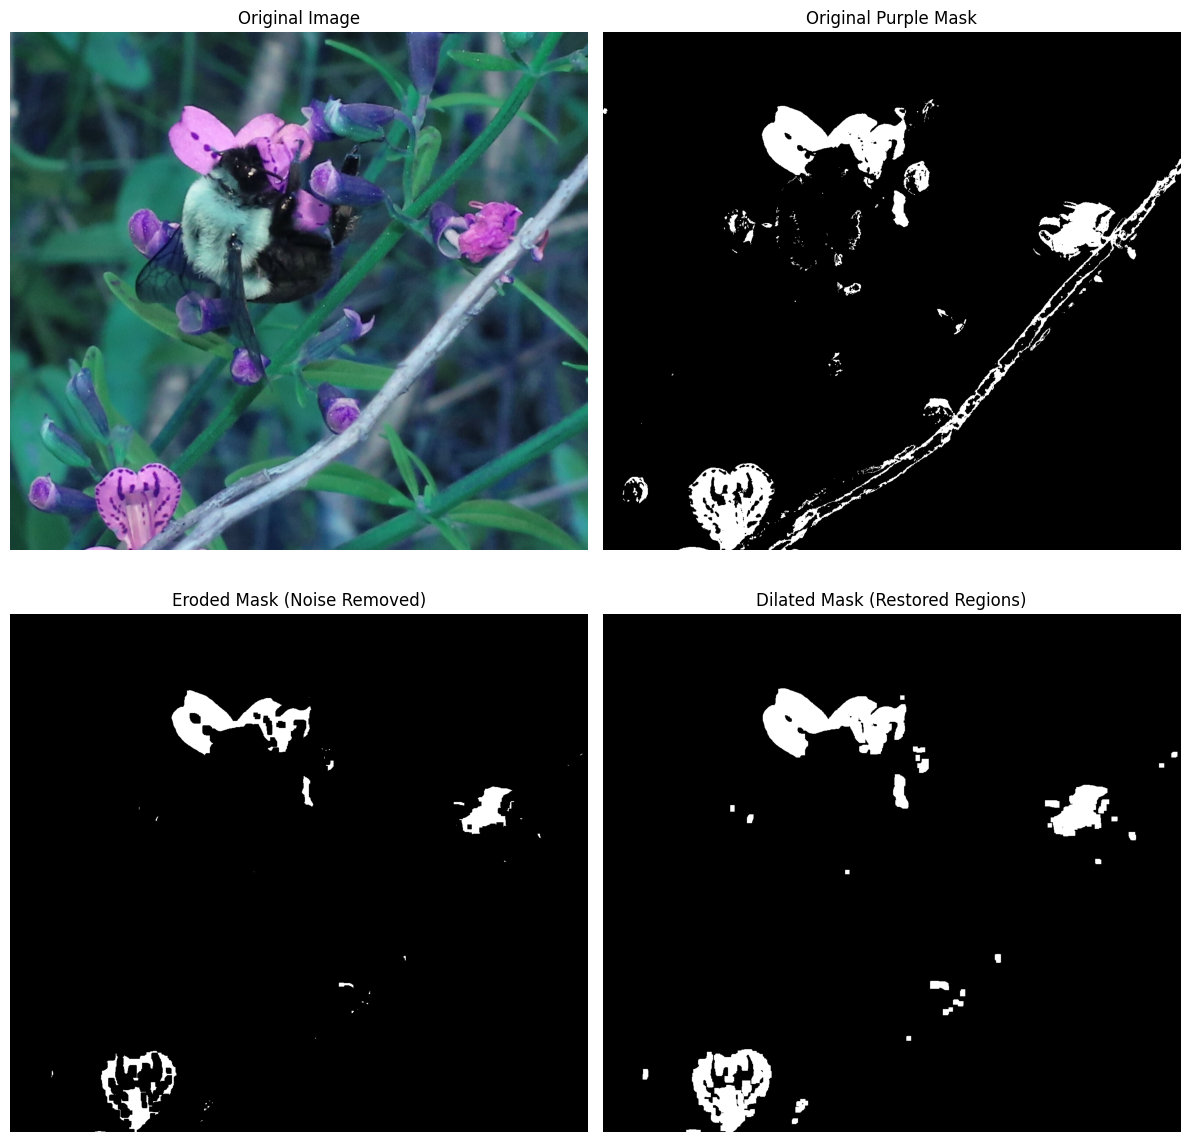

In [7]:
# Define a kernel for morphological operations
kernel = np.ones((10, 10), np.uint8)  # 10x10 square kernel

# Apply erosion to remove small white noise
eroded_mask = cv2.erode(purple_mask, kernel, iterations=1)

# Apply dilation to restore the shape of larger regions
dilated_mask = cv2.dilate(eroded_mask, kernel, iterations=1)

# Display the original mask and cleaned-up versions in a 2x2 layout
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Original image
axs[0, 0].imshow(image)
axs[0, 0].set_title("Original Image")
axs[0, 0].axis("off")

# Original purple mask
axs[0, 1].imshow(purple_mask, cmap="gray")
axs[0, 1].set_title("Original Purple Mask")
axs[0, 1].axis("off")

# Eroded mask
axs[1, 0].imshow(eroded_mask, cmap="gray")
axs[1, 0].set_title("Eroded Mask (Noise Removed)")
axs[1, 0].axis("off")

# Dilated mask
axs[1, 1].imshow(dilated_mask, cmap="gray")
axs[1, 1].set_title("Dilated Mask (Restored Regions)")
axs[1, 1].axis("off")

plt.tight_layout()
plt.show()



Finally, we will use the algorithm we developed here to sort through a series of iNaturalist images (that contain BOmbus impatiens) to see which ones have purple flowers and which don't

Error displaying image: index 5 is out of bounds for axis 1 with size 5
Error displaying image: index 6 is out of bounds for axis 1 with size 5
Error displaying image: index 7 is out of bounds for axis 1 with size 5
Error displaying image: index 8 is out of bounds for axis 1 with size 5
Error displaying image: index 9 is out of bounds for axis 1 with size 5
Error displaying image: index 5 is out of bounds for axis 1 with size 5
Error displaying image: index 6 is out of bounds for axis 1 with size 5
Error displaying image: index 7 is out of bounds for axis 1 with size 5
Error displaying image: index 8 is out of bounds for axis 1 with size 5
Error displaying image: index 9 is out of bounds for axis 1 with size 5


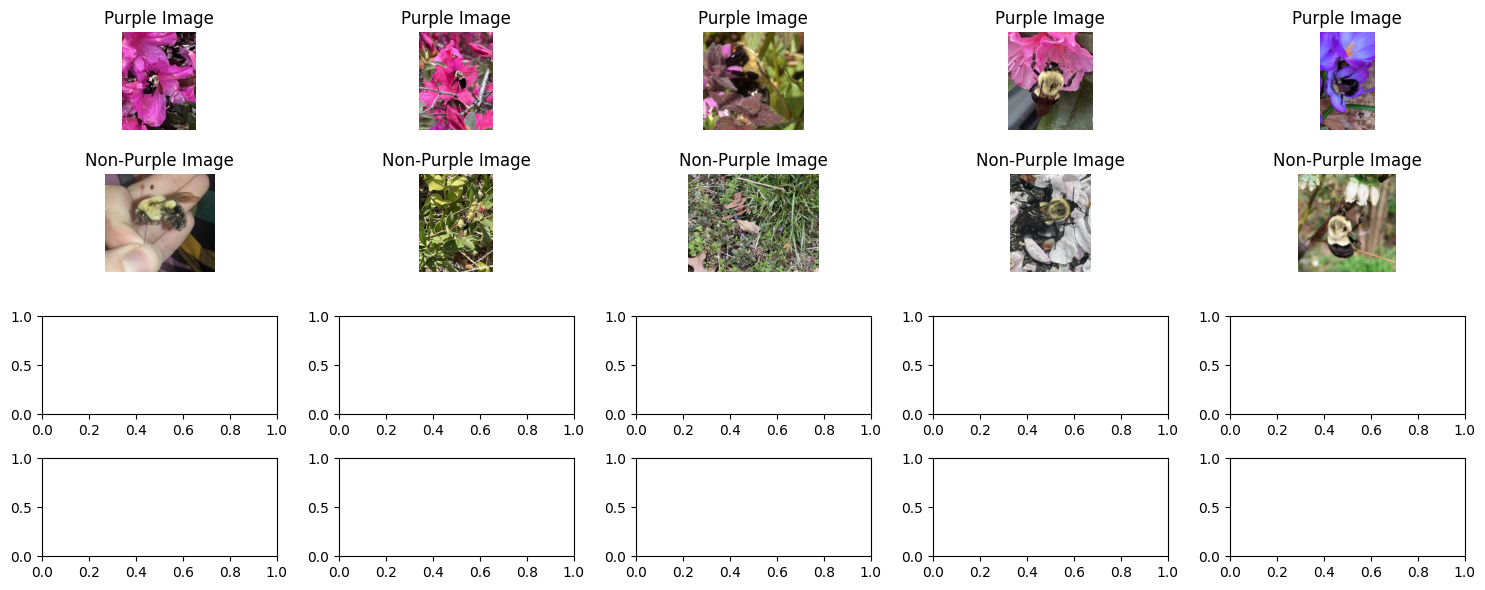

In [9]:
import pandas as pd
import cv2
import numpy as np
import requests
from PIL import Image
from io import BytesIO
import random
import matplotlib.pyplot as plt

# Load the CSV file
csv_path = '/content/drive/Shareddrives/Crall_Lab/Protocols/CV_workshop/observations-509928.csv'
data = pd.read_csv(csv_path)

# Extract image URLs
image_urls = data['image_url']

# Initialize lists to store results
purple_images = []
non_purple_images = []

# Purple filter thresholds
def apply_purple_filter(image):
    # Apply the purple filter
    purple_mask = (image[:, :, 0] > 150) & (image[:, :, 1] < 150) & (image[:, :, 2] > 150)
    purple_mask = purple_mask.astype(np.uint8) * 255  # Convert to binary format (0 or 255)

    # Morphological operations
    kernel = np.ones((10, 10), np.uint8)
    eroded_mask = cv2.erode(purple_mask, kernel, iterations=1)
    dilated_mask = cv2.dilate(eroded_mask, kernel, iterations=1)

    return dilated_mask

# Process each image
for url in image_urls:
    try:
        # Download and read the image
        response = requests.get(url, timeout=10)
        image_pil = Image.open(BytesIO(response.content))
        image = np.array(image_pil)

        # Apply the purple filter
        purple_mask = apply_purple_filter(image)

        # Count the number of purple pixels
        purple_pixel_count = np.sum(purple_mask > 0)

        # Classify the image
        if purple_pixel_count > 2000:
            purple_images.append(url)
        else:
            non_purple_images.append(url)
    except Exception as e:
        print(f"Error processing {url}: {e}")




Now plot the results!

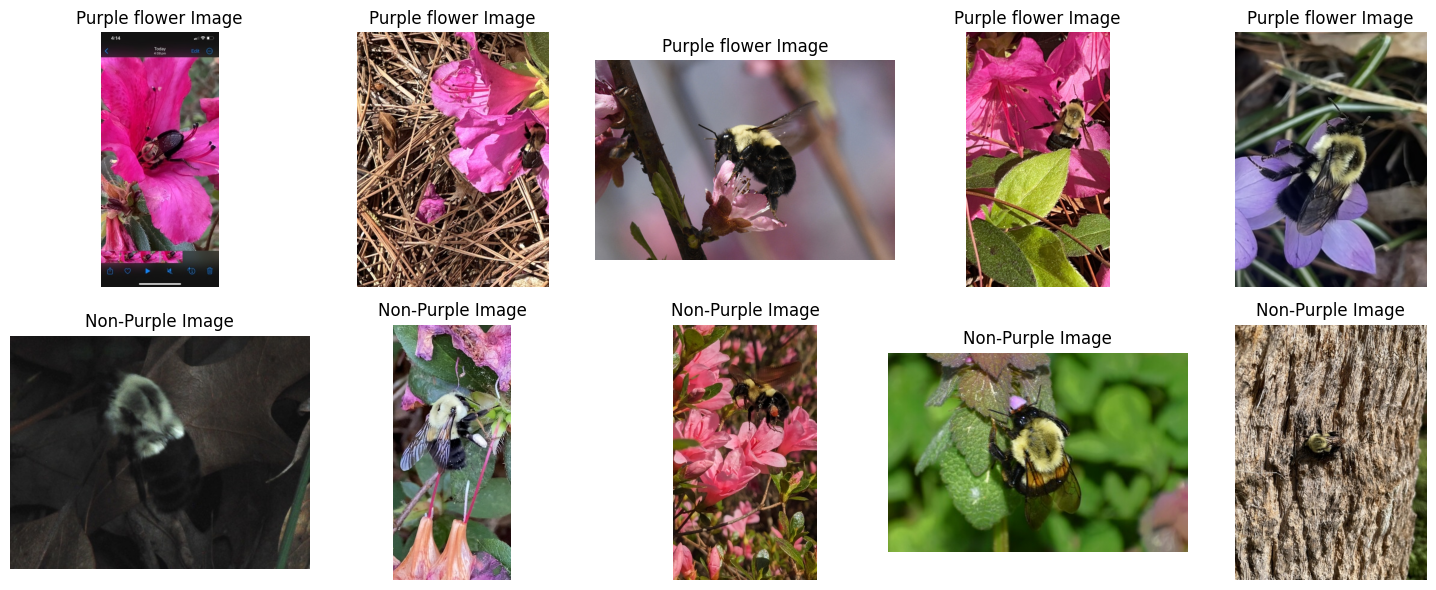

In [13]:
# Display the selected images in a 2x5 grid (10 images in total)
# Select 10 images from each category
selected_purple = random.sample(purple_images, min(len(purple_images), 5))
selected_non_purple = random.sample(non_purple_images, min(len(non_purple_images), 5))

fig, axs = plt.subplots(2, 5, figsize=(15, 6))

# Display purple images (first row)
for i, url in enumerate(selected_purple):
    try:
        response = requests.get(url, timeout=10)
        image_pil = Image.open(BytesIO(response.content))
        axs[0, i].imshow(image_pil)
        axs[0, i].set_title("Purple flower Image")
        axs[0, i].axis("off")
    except Exception as e:
        print(f"Error displaying image: {e}")

# Display non-purple images (second row)
for i, url in enumerate(selected_non_purple):
    try:
        response = requests.get(url, timeout=10)
        image_pil = Image.open(BytesIO(response.content))
        axs[1, i].imshow(image_pil)
        axs[1, i].set_title("Non-Purple Image")
        axs[1, i].axis("off")
    except Exception as e:
        print(f"Error displaying image: {e}")

plt.tight_layout()
plt.show()

In your sample, how many were correct?